# Sentiment Analysis: Customer Feedback

# Notebook 7.2: SVM Model

In this notebook, customer feedback/comments/reviews are analyzed to determine whether they are positive, negative, or neutral using the Support Vector Machine (SVM) model. Longer sentences are split into several phrases; each phrase is predicted separately, and the probabilities are summed and averaged to obtain aggregated sentence-level probabilities.

## Setup

In [1]:
# libraries to work with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# libraries for saving/loading models
import joblib
import sys
sys.path.append('../scripts')  # add the 'scripts' directory to sys.path
from aggregated_prediction import get_aggregated_prediction  # for model evaluation for long sentences

C:\Users\ASUS\anaconda3\envs\hexsoftwares_ml_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Loading Clean Datasets

In [2]:
df_train = pd.read_pickle('../datasets/final_training_dataset.pkl')
df_train

,review_text,sentiment
0,wow love place,1
1,crust not good,0
2,not tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1
...,...,...
25895,disappoint qualiti,0
25896,amaz experi highli recommend,1
25897,fast deliveri great packag,1
25898,great valu money,1


In [3]:
df_test = pd.read_pickle('../datasets/final_testing_dataset.pkl')
df_test

,review_text,sentiment
0,fantast spot even quit cocktail swell host yel...,1
1,love love love calamari good spici endless lis...,1
2,love place stiff martini cocktail cheap drink ...,1
3,everyth great cocktail bar great locat ambianc...,1
4,come pirat game around 530ish even get lucki t...,1
...,...,...
4316,wife catch show golden nugget hear good thing ...,0
4317,dumb show ever seen never laugh minut realiz w...,0
4318,girlfriend go show absolut terriblenot funni n...,0
4319,restroom look like bombard improvis shack amid...,0


## SVM: Data Splitting

The training dataset is split into features (X) and target (y). Each of these is further divided into a training set (X_train, y_train) and a validation set (X_val, y_val) to evaluate the model's generalization ability. A separate test set (X_test, y_test) is kept aside and does not need further division.

The **labels (y)** in the training, validation, and test datasets **should be integers** for multi-class classification.

In [4]:
# features and labels for the training dataset
X = df_train['review_text']  # raw text, not vectorized
y = df_train['sentiment'].values.astype(int)  # convert to integers

# split the training dataset into validation dataset
raw_X_train, raw_X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# features and labels for the testing dataset
raw_X_test = df_test['review_text']  # raw text, not vectorized
y_test = df_test['sentiment'].values.astype(int)  # convert to integers

# check the shape and data type of the datasets before and after splitting
elements = {
    "X": X,
    "raw_X_train": raw_X_train,
    "raw_X_val": raw_X_val,
    "raw_X_test": raw_X_test,
    "y": y,
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test
}

for name, element in elements.items():
    print(f"{name} shape: {element.shape}")
    print(f"{name} data type: {element.dtype}\n")

X shape: (25900,)
X data type: object

raw_X_train shape: (20720,)
raw_X_train data type: object

raw_X_val shape: (5180,)
raw_X_val data type: object

raw_X_test shape: (4321,)
raw_X_test data type: object

y shape: (25900,)
y data type: int64

y_train shape: (20720,)
y_train data type: int64

y_val shape: (5180,)
y_val data type: int64

y_test shape: (4321,)
y_test data type: int64



## SVM: Model Evaluation with Aggregated Prediction

In [5]:
# load logR model
MODEL_NAME = 'svm'
model = joblib.load('../models/sentiment_analysis_svm_model.joblib')

In [6]:
# make predictions
y_pred_val = []
for x in raw_X_val:  # use raw text, not vectorized
    y_pred_val.append(get_aggregated_prediction(x, model, model_name=MODEL_NAME))

y_pred_val = np.array(y_pred_val)
y_pred_val

array([0, 2, 0, ..., 1, 1, 1], shape=(5180,))

class names: ['Negative', 'Positive', 'Neutral']


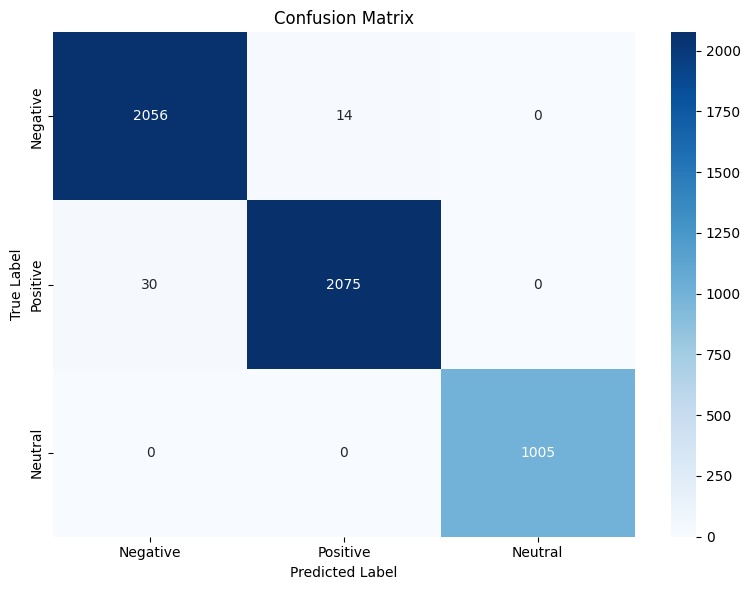

In [7]:
# create a confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

## actual labels
class_names = []

## get unique classes (integers)
classes = sorted(df_train['sentiment'].unique())

## map integers to actual labels
for c in classes:
    if c == 0:
        class_names.append("Negative")
    elif c == 1:
        class_names.append("Positive")
    elif c == 2:
        class_names.append("Neutral")

print(f"class names: {class_names}")

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## SVM: Model Testing with Aggregated Prediction

In [8]:
# make predictions
y_pred_test = []
for x in raw_X_test:  # use raw text, not vectorized
    y_pred_test.append(get_aggregated_prediction(x, model, model_name=MODEL_NAME))

y_pred_test = np.array(y_pred_test)
y_pred_test

array([1, 1, 0, ..., 1, 0, 0], shape=(4321,))

accuracy on test data with the best model: 0.726452
F1-macro on test data with the best model: 0.718393


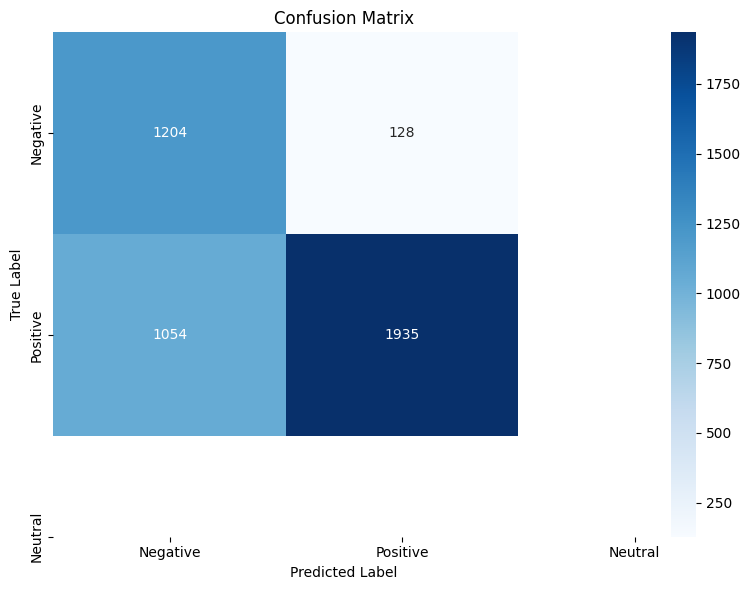

In [9]:
# evaluate scores on testing dataset
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1_macro = f1_score(y_test, y_pred_test, average='macro')

print(f"accuracy on test data with the best model: {test_accuracy:.6f}")
print(f"F1-macro on test data with the best model: {test_f1_macro:.6f}")

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## SVM: Normal Model Testing

In [10]:
# make predictions
y_pred_test_2 = model.predict(raw_X_test)  # use raw text, not vectorized
y_pred_test_2

array([1, 1, 1, ..., 0, 0, 0], shape=(4321,))

accuracy on test data with the best model: 0.788938
F1-macro on test data with the best model: 0.777810


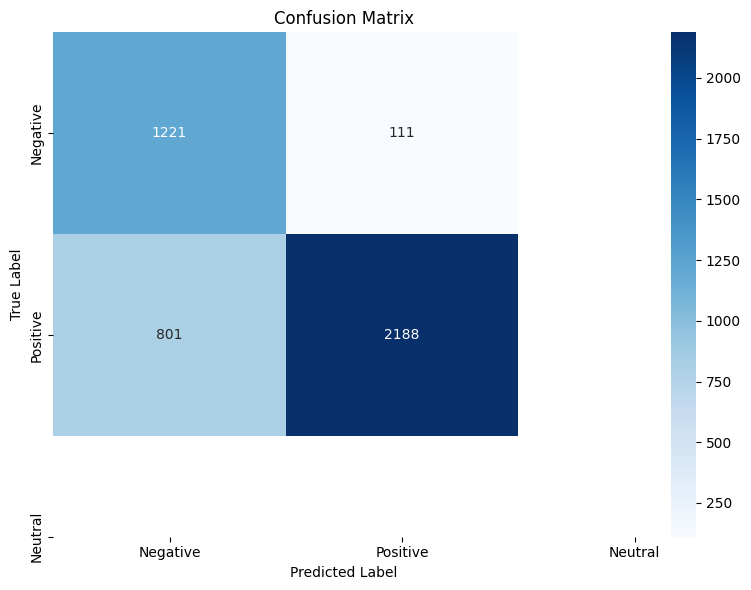

In [11]:
# evaluate scores on testing dataset
test_accuracy = accuracy_score(y_test, y_pred_test_2)
test_f1_macro = f1_score(y_test, y_pred_test_2, average='macro')

print(f"accuracy on test data with the best model: {test_accuracy:.6f}")
print(f"F1-macro on test data with the best model: {test_f1_macro:.6f}")

# create a confusion matrix
cm2 = confusion_matrix(y_test, y_pred_test_2)

# create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Data reveals that aggregated prediction **degrades** the SVM model's performance, reducing overall accuracy. The aggregated approach increases both false negatives and false positives, indicating that splitting sentences into chunks and averaging probabilities disrupts the SVM's ability to effectively classify sentiment.

SVM relies on the complete feature representation of the entire sentence to make optimal decisions at the decision boundary. When sentences are fragmented, the model loses the holistic context that is crucial for its linear classification approach, leading to poorer performance across both positive and negative sentiment classes. This suggests that for SVM, the full sentence context is essential, and aggregated prediction should not be used as it significantly harms the model's effectiveness.

This notebook is done by `La Wun Nannda`.